# Imports

In [1]:
#Imports de base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import du fichier à analyser
PA75016_df = pd.read_csv('../data/pollution/2_Processed/PA75016.csv').copy()
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


# Fonctions

In [3]:
#Définition de la fonction d'analyse globale
def analyse_df(df, corr_limit = 0.75):
    """Analyse any dataframe and print results
    * Print df Shape, duplicate rows qnt, memory usage, data types and call DataFrame.describe()
    * Check Missing values in each columns, returning qnt. and percentage 
    * Check Linear Correlation between columns, return Pearson number
    Keyword arguments:
    df -- Any DataFrame
    corr_limit -- Correlation Limit (Pearson) to define if relationship exists (default 0.75)
    """   

    print('General Info:')
    print(f'{df.shape[0]} Rows {df.shape[1]} Columns'
          f'\n{df.duplicated().sum()} Duplicated Rows'
          f'\nMemory Usage: {df.memory_usage().sum()/(1024*1024):.2f}Mb')
    
    # Checking Data Types
    int_list, float_list,object_list,bool_list,other_list =[[] for i in range(5)]
    for col in df.columns:
        if df[col].dtype == 'int64':
            int_list.append(col)
        elif df[col].dtype == 'float64':
            float_list.append(col)
        elif df[col].dtype == 'object':
            object_list.append(col)
        elif df[col].dtype == 'boolean':
            bool_list.append(col)
        else:
            other_list.append(col)
            
    for type_list,data_type in zip([int_list, float_list,object_list,bool_list,other_list],
                                   ['int64','float64','object','boolean','other']):
        if len(type_list)>0:
            print(f'\nColumns {data_type}: {type_list}')
            
    # General statistics
    display(round(df.describe(),2))
    
    # Checking Missing Values in each columns
    print('\nCheking Missing Values:')
    col_with_missing_counter = 0
    for col in df.columns:
        qnt_missing = df[col].isna().sum()
        if qnt_missing > 0:
            col_with_missing_counter +=1
            print(f'Column "{col}" has {qnt_missing} missing values ({qnt_missing/df.shape[0]:.2%})')
    if col_with_missing_counter ==0 :
        print('Analyzed DataFrame has no missing values')
        
    # Checking linear correlation between columns
    print('\nChecking Linear Correlation:')
    df_corr = df.corr() # Correlation DataFrame
    ckecked_list =[] # Ensure that we won't print the same information twice
    cols_with_correlation_counter = 0
    for col in df_corr.columns:
        ckecked_list.append(col)
        for i in range(len(df_corr)):
            if ((df_corr[col][i] > corr_limit or df_corr[col][i] < -corr_limit) and
                (df_corr.index[i] not in ckecked_list)):
                cols_with_correlation_counter += 1
                print(f'Linear Correlation found between columns '
                      f'{df_corr.index[i]} and {col} -> Pearson coef. = {df_corr[col][i]:.2f}')         
    if cols_with_correlation_counter == 0:
        print('No linear correlation was found')

# EDA

In [4]:
#Analyse du fichier PA75016
analyse_df(PA75016_df)

General Info:
42576 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 2.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name', 'Station_type']


,PM25,PM10,NO2,O3,SO2
count,41250.0,41426.00,40760.00,0.0,25444.00
mean,15.1,33.39,73.22,NaN,1.31
std,8.9,17.56,29.11,NaN,1.36
min,0.0,0.40,5.10,NaN,0.00
25%,9.2,21.02,53.50,NaN,0.20
50%,13.0,29.90,71.10,NaN,1.00
75%,18.4,41.80,90.30,NaN,2.00
max,193.0,253.00,286.00,NaN,75.90



Cheking Missing Values:
Column "PM25" has 1326 missing values (3.11%)
Column "PM10" has 1150 missing values (2.70%)
Column "NO2" has 1816 missing values (4.27%)
Column "O3" has 42576 missing values (100.00%)
Column "SO2" has 17132 missing values (40.24%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.78


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_79546/2095795055.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


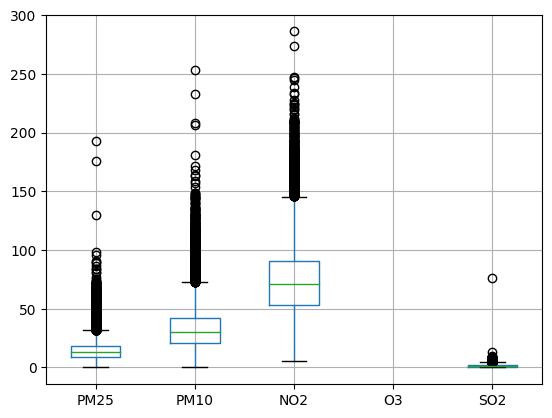

In [5]:
PA75016_df.boxplot();

In [51]:
PA75016_df['PM25'].mean()

15.097876363636365

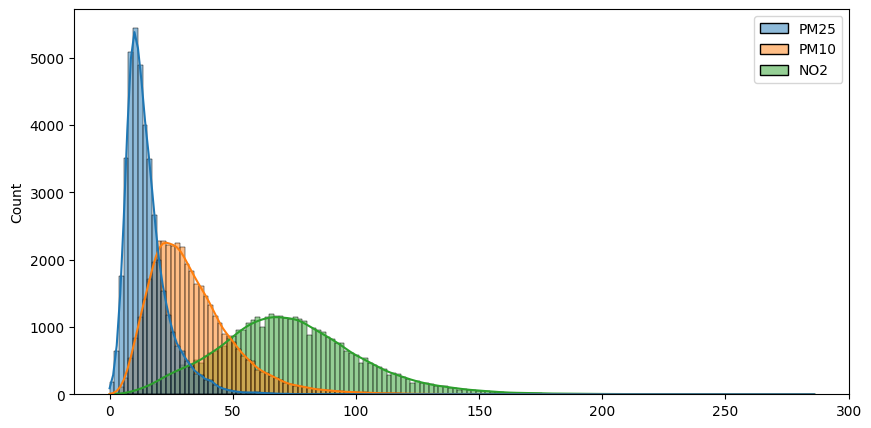

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(data=PA75016_df,kde=True,bins=150)
plt.show()

# Filter by year

In [6]:
PA75016_df['Date_time'] = pd.to_datetime(PA75016_df['Date_time'])
PA75016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42576 entries, 0 to 42575
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date_time     42576 non-null  datetime64[ns, UTC]
 1   PM25          41250 non-null  float64            
 2   PM10          41426 non-null  float64            
 3   NO2           40760 non-null  float64            
 4   O3            0 non-null      float64            
 5   SO2           25444 non-null  float64            
 6   Station_name  42576 non-null  object             
 7   Station_type  42576 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), object(2)
memory usage: 2.6+ MB


In [7]:
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022-11-14 20:00:00+00:00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022-11-14 21:00:00+00:00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022-11-14 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022-11-14 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [8]:
PA75016_df_2018 = PA75016_df[PA75016_df['Date_time'] >= "2018/01/01 00:00:00+00"]
PA75016_df_2018 = PA75016_df_2018[PA75016_df_2018['Date_time'] < "2019/01/01 00:00:00+00"]
PA75016_df_2018

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
8754,2018-12-31 19:00:00+00:00,20.2,49.5,122.9,NaN,2.9,75016 - Porte Auteuil,Traffic
8755,2018-12-31 20:00:00+00:00,15.1,38.1,128.3,NaN,2.6,75016 - Porte Auteuil,Traffic
8756,2018-12-31 21:00:00+00:00,26.9,48.1,113.9,NaN,2.7,75016 - Porte Auteuil,Traffic
8757,2018-12-31 22:00:00+00:00,25.2,41.5,108.8,NaN,2.6,75016 - Porte Auteuil,Traffic


In [9]:
PA75016_df_2019 = PA75016_df[PA75016_df['Date_time'] >= "2019/01/01 00:00:00+00"]
PA75016_df_2019 = PA75016_df_2019[PA75016_df_2019['Date_time'] < "2020/01/01 00:00:00+00"]
PA75016_df_2019

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
8759,2019-01-01 00:00:00+00:00,20.5,29.5,90.7,NaN,1.6,75016 - Porte Auteuil,Traffic
8760,2019-01-01 01:00:00+00:00,23.2,38.5,108.5,NaN,2.1,75016 - Porte Auteuil,Traffic
8761,2019-01-01 02:00:00+00:00,18.1,25.2,96.0,NaN,2.2,75016 - Porte Auteuil,Traffic
8762,2019-01-01 03:00:00+00:00,20.4,23.3,106.0,NaN,1.8,75016 - Porte Auteuil,Traffic
8763,2019-01-01 04:00:00+00:00,18.7,28.6,107.9,NaN,1.8,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
17442,2019-12-31 19:00:00+00:00,42.6,56.7,47.8,NaN,0.0,75016 - Porte Auteuil,Traffic
17443,2019-12-31 20:00:00+00:00,48.4,65.5,63.9,NaN,0.0,75016 - Porte Auteuil,Traffic
17444,2019-12-31 21:00:00+00:00,59.7,84.1,89.4,NaN,0.5,75016 - Porte Auteuil,Traffic
17445,2019-12-31 22:00:00+00:00,55.7,74.4,85.8,NaN,0.4,75016 - Porte Auteuil,Traffic


In [10]:
PA75016_df_2020 = PA75016_df[PA75016_df['Date_time'] >= "2020/01/01 00:00:00+00"]
PA75016_df_2020 = PA75016_df_2020[PA75016_df_2020['Date_time'] < "2021/01/01 00:00:00+00"]
PA75016_df_2020

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
17447,2020-01-01 00:00:00+00:00,77.2,88.7,58.3,NaN,0.1,75016 - Porte Auteuil,Traffic
17448,2020-01-01 01:00:00+00:00,95.6,114.5,54.9,NaN,1.9,75016 - Porte Auteuil,Traffic
17449,2020-01-01 02:00:00+00:00,47.9,56.6,40.6,NaN,0.7,75016 - Porte Auteuil,Traffic
17450,2020-01-01 03:00:00+00:00,31.8,33.5,44.0,NaN,0.1,75016 - Porte Auteuil,Traffic
17451,2020-01-01 04:00:00+00:00,15.0,23.8,41.1,NaN,0.0,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
26226,2020-12-31 19:00:00+00:00,37.6,61.0,127.9,NaN,0.0,75016 - Porte Auteuil,Traffic
26227,2020-12-31 20:00:00+00:00,36.7,53.8,105.9,NaN,0.0,75016 - Porte Auteuil,Traffic
26228,2020-12-31 21:00:00+00:00,42.5,53.6,80.7,NaN,0.0,75016 - Porte Auteuil,Traffic
26229,2020-12-31 22:00:00+00:00,46.6,53.0,77.3,NaN,0.0,75016 - Porte Auteuil,Traffic


In [11]:
PA75016_df_2021 = PA75016_df[PA75016_df['Date_time'] >= "2021/01/01 00:00:00+00"]
PA75016_df_2021 = PA75016_df_2021[PA75016_df_2021['Date_time'] < "2022/01/01 00:00:00+00"]
PA75016_df_2021

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
26231,2021-01-01 00:00:00+00:00,40.5,48.4,53.6,NaN,0.0,75016 - Porte Auteuil,Traffic
26232,2021-01-01 01:00:00+00:00,46.0,58.6,62.6,NaN,0.0,75016 - Porte Auteuil,Traffic
26233,2021-01-01 02:00:00+00:00,45.8,52.8,55.5,NaN,1.3,75016 - Porte Auteuil,Traffic
26234,2021-01-01 03:00:00+00:00,41.9,47.3,58.0,NaN,4.7,75016 - Porte Auteuil,Traffic
26235,2021-01-01 04:00:00+00:00,34.7,44.7,52.6,NaN,3.8,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
34938,2021-12-31 19:00:00+00:00,25.0,37.8,88.4,NaN,NaN,75016 - Porte Auteuil,Traffic
34939,2021-12-31 20:00:00+00:00,23.5,24.2,68.8,NaN,NaN,75016 - Porte Auteuil,Traffic
34940,2021-12-31 21:00:00+00:00,12.2,19.3,54.3,NaN,NaN,75016 - Porte Auteuil,Traffic
34941,2021-12-31 22:00:00+00:00,16.3,26.3,53.1,NaN,NaN,75016 - Porte Auteuil,Traffic


In [12]:
PA75016_df_2022 = PA75016_df[PA75016_df['Date_time'] >= "2022/01/01 00:00:00+00"]
PA75016_df_2022 = PA75016_df_2022[PA75016_df_2022['Date_time'] < "2022/11/14 20:00:00+00"]
PA75016_df_2022

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
34943,2022-01-01 00:00:00+00:00,14.5,27.8,48.2,NaN,NaN,75016 - Porte Auteuil,Traffic
34944,2022-01-01 01:00:00+00:00,25.4,33.8,42.7,NaN,NaN,75016 - Porte Auteuil,Traffic
34945,2022-01-01 02:00:00+00:00,24.0,36.6,43.7,NaN,NaN,75016 - Porte Auteuil,Traffic
34946,2022-01-01 03:00:00+00:00,25.7,25.5,32.5,NaN,NaN,75016 - Porte Auteuil,Traffic
34947,2022-01-01 04:00:00+00:00,16.5,25.7,31.3,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42566,2022-11-14 15:00:00+00:00,21.6,34.3,44.3,NaN,NaN,75016 - Porte Auteuil,Traffic
42567,2022-11-14 16:00:00+00:00,15.6,27.5,47.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42568,2022-11-14 17:00:00+00:00,18.9,34.9,46.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42569,2022-11-14 18:00:00+00:00,9.9,29.5,45.0,NaN,NaN,75016 - Porte Auteuil,Traffic


# EDA per year

In [13]:
#Analyse du fichier PA75016 pour 2018
analyse_df(PA75016_df_2018)

General Info:
8759 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 0.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Station_name', 'Station_type']

Columns other: ['Date_time']


,PM25,PM10,NO2,O3,SO2
count,8280.00,8282.00,8401.00,0.0,8533.00
mean,17.44,39.60,86.74,NaN,2.04
std,9.82,18.75,31.06,NaN,1.31
min,0.00,3.50,14.00,NaN,0.00
25%,10.80,26.50,66.00,NaN,1.00
50%,15.30,37.00,84.00,NaN,2.00
75%,21.60,49.40,105.00,NaN,3.00
max,193.00,253.00,286.00,NaN,13.00



Cheking Missing Values:
Column "PM25" has 479 missing values (5.47%)
Column "PM10" has 477 missing values (5.45%)
Column "NO2" has 358 missing values (4.09%)
Column "O3" has 8759 missing values (100.00%)
Column "SO2" has 226 missing values (2.58%)

Checking Linear Correlation:
No linear correlation was found


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_79546/2095795055.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [14]:
#Analyse du fichier PA75016 pour 2019
analyse_df(PA75016_df_2019)

General Info:
8688 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 0.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Station_name', 'Station_type']

Columns other: ['Date_time']


,PM25,PM10,NO2,O3,SO2
count,8552.00,8557.00,8184.00,0.0,8566.00
mean,15.68,35.96,79.29,NaN,0.97
std,9.47,19.28,29.92,NaN,1.08
min,0.00,2.10,9.70,NaN,0.00
25%,9.30,22.70,59.00,NaN,0.20
50%,13.20,32.10,77.20,NaN,0.70
75%,19.10,44.50,97.40,NaN,1.40
max,97.90,163.10,233.90,NaN,8.80



Cheking Missing Values:
Column "PM25" has 136 missing values (1.57%)
Column "PM10" has 131 missing values (1.51%)
Column "NO2" has 504 missing values (5.80%)
Column "O3" has 8688 missing values (100.00%)
Column "SO2" has 122 missing values (1.40%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.81


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_79546/2095795055.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [15]:
#Analyse du fichier PA75016 pour 2020
analyse_df(PA75016_df_2020)

General Info:
8784 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 0.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Station_name', 'Station_type']

Columns other: ['Date_time']


,PM25,PM10,NO2,O3,SO2
count,8483.00,8543.00,8372.00,0.0,8067.00
mean,12.75,29.88,65.86,NaN,0.87
std,8.18,15.54,28.20,NaN,1.08
min,0.00,0.40,5.10,NaN,0.00
25%,7.80,19.20,46.20,NaN,0.00
50%,11.00,27.30,64.55,NaN,0.50
75%,15.50,37.50,82.90,NaN,1.40
max,95.60,208.50,211.40,NaN,8.00



Cheking Missing Values:
Column "PM25" has 301 missing values (3.43%)
Column "PM10" has 241 missing values (2.74%)
Column "NO2" has 412 missing values (4.69%)
Column "O3" has 8784 missing values (100.00%)
Column "SO2" has 717 missing values (8.16%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.76


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_79546/2095795055.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [16]:
#Analyse du fichier PA75016 pour 2021
analyse_df(PA75016_df_2021)

General Info:
8712 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 0.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Station_name', 'Station_type']

Columns other: ['Date_time']


,PM25,PM10,NO2,O3,SO2
count,8445.00,8553.00,8395.00,0.0,278.00
mean,14.82,31.04,67.13,NaN,2.01
std,7.85,16.11,24.44,NaN,4.66
min,0.00,3.90,6.00,NaN,0.00
25%,9.40,20.00,51.10,NaN,0.80
50%,13.20,27.60,66.60,NaN,1.60
75%,18.30,38.50,82.80,NaN,2.30
max,64.70,206.20,177.00,NaN,75.90



Cheking Missing Values:
Column "PM25" has 267 missing values (3.06%)
Column "PM10" has 159 missing values (1.83%)
Column "NO2" has 317 missing values (3.64%)
Column "O3" has 8712 missing values (100.00%)
Column "SO2" has 8434 missing values (96.81%)

Checking Linear Correlation:
No linear correlation was found


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_79546/2095795055.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [17]:
#Analyse du fichier PA75016 pour 2022
analyse_df(PA75016_df_2022)

General Info:
7628 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 0.52Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Station_name', 'Station_type']

Columns other: ['Date_time']


,PM25,PM10,NO2,O3,SO2
count,7489.00,7490.00,7406.00,0.0,0.0
mean,14.82,30.26,66.41,NaN,NaN
std,8.34,15.48,24.61,NaN,NaN
min,0.30,3.00,7.30,NaN,NaN
25%,9.40,19.40,49.22,NaN,NaN
50%,12.60,26.90,64.70,NaN,NaN
75%,17.70,37.50,80.40,NaN,NaN
max,89.70,127.00,196.70,NaN,NaN



Cheking Missing Values:
Column "PM25" has 139 missing values (1.82%)
Column "PM10" has 138 missing values (1.81%)
Column "NO2" has 222 missing values (2.91%)
Column "O3" has 7628 missing values (100.00%)
Column "SO2" has 7628 missing values (100.00%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.80


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_79546/2095795055.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


# Conlusion de l'EDA

Synthèse de l'EDA sur la station PA75016:
- De 2018 à 2022, la part de NaN est faible pour les polluants suivants : PM25, PM10 & NO2 (<6% de NaN) --> **À garder.**
- Concernnant le SO2, la part de NaN est faible, progresse à partir de 2020, pour exploser en 2021, et atteindre 100% en 2022. -->  **À dropper.**
- Concernant l'O3, le nombre de NaN est à 100% de 2018 à 2022 --> **À dropper.**

# Drop des colonnes avec beaucoup de Nan

In [19]:
PA75016_df = PA75016_df.drop(columns=['O3', 'SO2', 'Station_name', 'Station_type'])

In [22]:
PA75016_df.set_index('Date_time')

,PM25,PM10,NO2
Date_time,,,
2018-01-01 01:00:00+00:00,NaN,NaN,NaN
2018-01-01 02:00:00+00:00,NaN,NaN,NaN
2018-01-01 03:00:00+00:00,NaN,NaN,NaN
2018-01-01 04:00:00+00:00,NaN,NaN,NaN
2018-01-01 05:00:00+00:00,NaN,NaN,NaN
...,...,...,...
2022-11-14 20:00:00+00:00,14.5,18.8,41.5
2022-11-14 21:00:00+00:00,NaN,NaN,34.5
2022-11-14 22:00:00+00:00,NaN,NaN,NaN


In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

num_features_normal = ['NO2']
num_features_skewed = ['PM25','PM10']


num_transformer_normal = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler())

num_transformer_skewed = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler())

preprocessor = make_column_transformer(
    (num_transformer_normal, num_features_normal),
    (num_transformer_skewed, num_features_skewed))

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['NO2']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['PM25', 'PM10'])])

In [63]:
PA75016_preprocessed = pd.DataFrame(preprocessor.fit_transform(PA75016_df))
PA75016_preprocessed = PA75016_preprocessed.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
PA75016_preprocessed

,PM25,PM10,NO2
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
42571,-0.850575,0.170455,-0.552239
42572,-1.051724,0.000000,0.000000
42573,0.000000,0.000000,0.000000
42574,0.000000,0.000000,0.000000


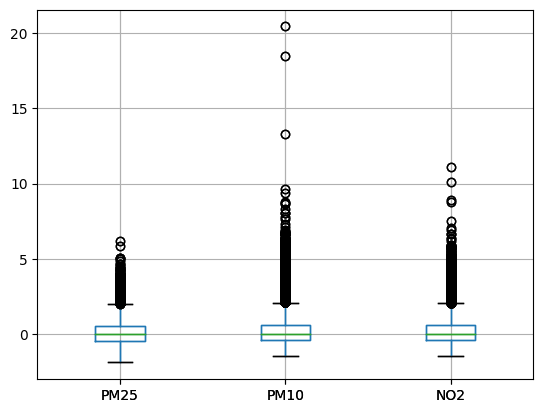

In [65]:
PA75016_preprocessed.boxplot();
plt.show()